### 1(a) Display all the matches, using provided SIFT features.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import os
path="/home/li/Desktop/_computation/computer_vision/project5"
os.chdir(path)

#img2=cv2.imread("et2.jpg",0)
data=np.loadtxt("etmatches.txt")  #load sift matches (points correspondences)
x1=data[:,0]
y1=data[:,1]
x2=data[:,2]
y2=data[:,3]

The total number of SIFT feature correspondences is:689


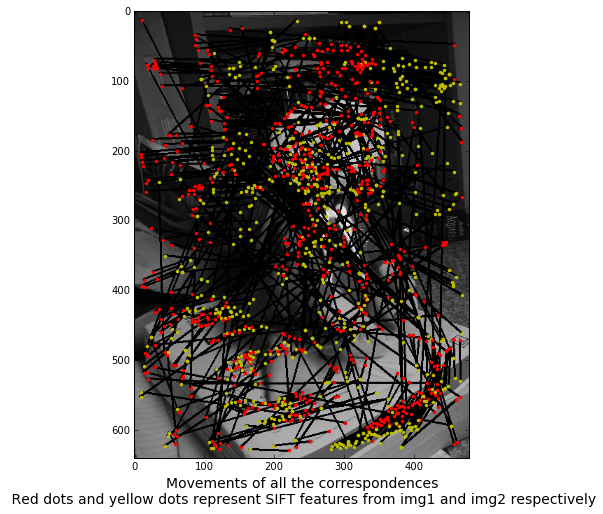

In [2]:
plt.figure(figsize=(15,8))
img1=cv2.imread("et1.jpg",0)
for i in range(len(x1)):
    cv2.line(img1,(int(x1[i]),int(y1[i])),(int(x2[i]),int(y2[i])),(0,122,0),2)
    plt.plot(x1[i],y1[i],"r.")
    plt.plot(x2[i],y2[i],"y.")
print("The total number of SIFT feature correspondences is:%d"%len(x1))
plt.imshow(img1,cmap=plt.cm.gray)
plt.xlabel("Movements of all the correspondences\n Red dots and yellow dots represent SIFT features from img1 and img2 respectively",fontsize=14)

As you can see, not all of the matches are correct, therefore, we set a maximum allowed movement in order to remove incorrect correspondences.

In [2]:
dist=[]
threshold=200
for i in range(len(x1)):
    d=np.sqrt(pow((x1[i]-x2[i]),2)+ pow((y1[i]-y2[i]),2))
    dist.append(d)

The number of remaining matches is 571


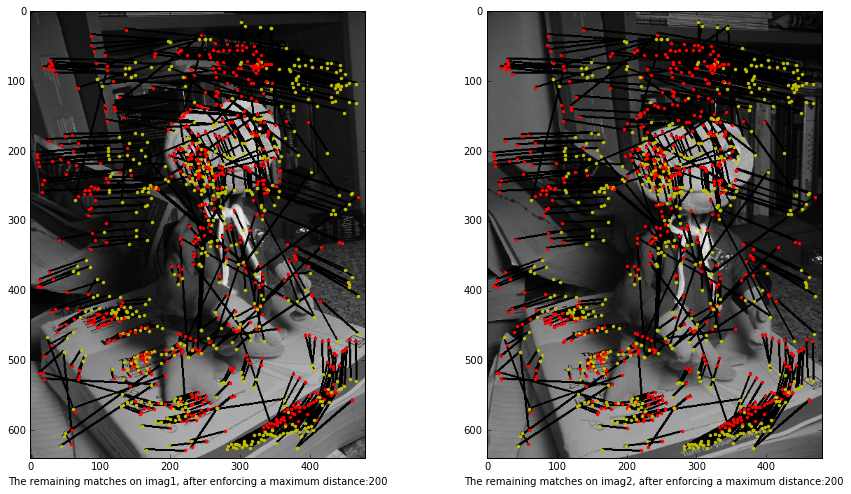

In [4]:
img1=cv2.imread("et1.jpg",0)
img2=cv2.imread("et2.jpg",0)

plt.figure(figsize=(15,8))
plt.subplot(121)
a=[]
for m,n in enumerate(dist):
    if n<threshold:
        a.append(m)
        cv2.line(img1,(int(x1[m]),int(y1[m])),(int(x2[m]),int(y2[m])),(0,122,0),2)
        plt.plot(x1[m],y1[m],"r.")
        plt.plot(x2[m],y2[m],"y.")
        
plt.imshow(img1,cmap=plt.cm.gray)    
plt.xlabel("The remaining matches on imag1, after enforcing a maximum distance:%d"%threshold,fontsize=10)

plt.subplot(122)

for m in a:
        cv2.line(img2,(int(x1[m]),int(y1[m])),(int(x2[m]),int(y2[m])),(0,122,0),2)
        plt.plot(x1[m],y1[m],"r.")
        plt.plot(x2[m],y2[m],"y.")
plt.imshow(img2,cmap=plt.cm.gray)
    
plt.xlabel("The remaining matches on imag2, after enforcing a maximum distance:%d"%threshold,fontsize=10)
print("The number of remaining matches is %d"%len(a))

### Comment: After settting a threshold distance between x and x' , x is the feature in image1 while x' is the corresponding match in image2,  though quite a  few incorrect matches are removed, but not all of them. There are still some obvious  inconformities exist (i.e. on the bookshelf and on face of ET).  The maximum distance is set to be 200,  actually, we may apply smaller distance to filter out more incorrect matches , but distance is not the only criteria to seperate them. Alternatively,  we employ RANSAC to estimate the remaining corresponding points. 

### 1.(b)(i)  Provement

Suppose we have a point $x_{i}$ , the xy coordinate value is $(x_{k}, y_{k})$ and point $\hat{x_{i}}$ with coordinate $(\hat{x_k}, \hat{y_k})$ ,following the tranformation, $\hat{x_i} = T x_i $, $$T=[[\frac{\sqrt{2}}{d},0,-\bar{x} \frac{\sqrt{2}}{d}],[0,\frac{\sqrt{2}}{d},- \bar{y} \frac{\sqrt{2}}{d}],[0,0,1]]$$The two equation can be easily obtained. $$ \hat{x_k} = x_k \frac{\sqrt{2}}{d} - \bar{x} \frac{\sqrt{2}}{d} $$  and $$\hat{y_k} = y_k \frac{\sqrt{2}}{d} - \bar{y} \frac{\sqrt{2}}{d}$$   Summing over k ,(k=1,2,3, ...n ) and averaging it. we get  :
 $$ \frac{1}{n}\sum_{k=1}^n\hat{x_k} = \frac{1}{n} \sum_{k=1}^n x_k \frac{\sqrt{2}}{d} - \bar{x} \frac{\sqrt{2}}{d}$$
 $$\bar{\hat{x}} = \bar{x} \frac{\sqrt{2}}{d} -\bar{x} \frac{\sqrt{2}}{d} =0 $$ 
 
 The same processing to $\hat{y_k} $  :
  $$ \frac{1}{n}\sum_{k=1}^n\hat{y_k} = \frac{1}{n} \sum_{k=1}^n y_k \frac{\sqrt{2}}{d} - \bar{y} \frac{\sqrt{2}}{d}$$
 
  $$\bar{\hat{y}} = \bar{y} \frac{\sqrt{2}}{d} -\bar{y} \frac{\sqrt{2}}{d} =0 $$ 
 
 
 

 Therefore, the mean of set $\{ \hat{x_i}\}$ is zero. ($\bar{\hat{x}} =0$, $\bar{\hat{y}}=0$)
 
 
 
 $$  d(\hat{x_{i}})_{average} = \frac{1}{n} \sum_{k=1}^n \sqrt{(\hat{x_k} -\hat{x_l})^2 + (\hat{y_k} -\hat{y_l} )^2 }= \frac{\sqrt 2 }{d} \frac{1}{n} \sum_{k=1}^n \sqrt{(x_k -x_l)^2 + (y_k -y_l )^2 } = \sqrt{2}$$ 




### 1.(b)(ii)
The normalized set of correspondences ($\hat{x_i}, \hat{x_i'}$) relate the fundamental matrix by $\hat{x_i'} \hat{F'} \hat{x_i} = 0$.  While $\hat{x_i'} = T' x_i' ,   \hat{x_i} = T x_i $, together with the original set of corredponding points pairs ($x_i , x_i'$)  give fundamental matrix F  $x_i' F x_i = 0$ .
we can rewrite the equation  $$\hat{x_i'} \hat{F'} \hat{x_i} = x_i' F x_i   = {x_i'}^T T'^T \hat{F'}  T x_i =0 $$ It is equivalent to say denormalizing $ \hat{F'} $ $$F= T'^T \hat{F'}  T  $$

### 1(c)

First normalizing  image coordinates, and applying normalize-8points-algorithm to find inliers .



Randomly select 8 normalized matches to contruct the normalized fundamental matrix $\hat{F}'$. Compute the svd of $\hat{F}'$ and setting the third eigenvalue to be zero.



Denormalizing $\hat{F}'$,$F =  T'^T \hat{F'}  T$ ,   together with original coordinate sets  ($x_i$ ,$x_i'$) to caculate the Sampson distance, the Sampson for each pair is determinated by
$$d_i = \frac{(x_i'Fx)^2}{(Fx_i)_1^2+ (Fx_i)_2^2 + (F^Tx_i')_1^2 +(F^T x_i')_2^2} $$

the index 1 in  $(Fx_i)_1$ means the first element of vector $Fx_i$ . 


Setting a maximum sampson distance to count how many of the rest correspondences consist with this computed  $\hat{F}'$,  the ideal constructed $\hat{F}'$ has the largest counts of consensus. 

The resulting caculated number of inliers is 65. 

Finally, we use all the inlier matches to re-estimate fundamental matrix $F$.

In [3]:
x1_m=[] #the remaining correct match
y1_m=[]
x2_m=[]
y2_m=[]
x1_ave=0
y1_ave=0
x2_ave=0
y2_ave=0
d1_ave=0
d2_ave=0
for m,n in enumerate(dist):
    if n<threshold:
        x1_ave+=x1[m]
        y1_ave+=y1[m]
        x2_ave+=x2[m]
        y2_ave+=y2[m]
        x1_m.append(x1[m])
        y1_m.append(y1[m])
        x2_m.append(x2[m])
        y2_m.append(y2[m])
x1_ave/=len(x1_m)
y1_ave/=len(x1_m)
x2_ave/=len(x1_m)
y2_ave/=len(x1_m)

for i,j in zip(x1_m,y1_m):
    d1_ave+=np.sqrt(pow((i-x1_ave),2)+pow((j-y1_ave),2))
for l,q in zip(x2_m,y2_m):
    d2_ave+=np.sqrt(pow((l-x2_ave),2)+pow((q-y2_ave),2))
    
d1_ave/=len(x1_m)
d2_ave/=len(x1_m)
print(d1_ave,d2_ave)

194.859558532 191.720985076


In [4]:
def normalize(x,y,x_ave,y_ave,d_ave):
    x_normal=[]
    a=np.sqrt(2)
    T=np.zeros((3,3),dtype="double")
    T[0,0]=a/d_ave
    T[0,2]=-x_ave*a/d_ave
    T[1,1]=a/d_ave
    T[1,2]=-y_ave*a/d_ave
    T[2,2]=1
    for i in range(len(x1_m)):
        x_normal_element=np.dot(T,[x[i],y[i],1])
        x_normal_element/=x_normal_element[2]  #normalize x^hat , the botom entry is 1
        x_normal.append(x_normal_element)
    return (x_normal,T)

In [5]:
x1_normal=normalize(x1_m,y1_m,x1_ave,y1_ave,d1_ave)[0]  #using remaining matches

T1=normalize(x1_m,y1_m,x1_ave,y1_ave,d1_ave)[1]

x2_normal=normalize(x2_m,y2_m,x2_ave,y2_ave,d2_ave)[0]

T2=normalize(x2_m,y2_m,x2_ave,y2_ave,d2_ave)[1]
print(len(x1_normal))

571


In [ ]:
# The norm 8points algorithm  RANSAC
maxcount=0
dmin=3e-3
x1_normal_inliers=[]
x2_normal_inliers=[]
x1_inliers=[]
x2_inliers=[]
runs=5000
for t in range(0,runs):

    n=len(x1_m)
    pick=np.random.randint(0,n,size=8)   #random pick 8 correspondences
    
    A=np.zeros((8,9),dtype="double")
    h=0
    for j in pick:

        A[h,:]=[x1_normal[j][0]*x2_normal[j][0], x1_normal[j][1]*x2_normal[j][0],x2_normal[j][0],
                x1_normal[j][0]*x2_normal[j][1], x1_normal[j][1]*x2_normal[j][1],x2_normal[j][1],
               x1_normal[j][0],x1_normal[j][1],1]
        h+=1
   
    #m=len(x1_m)
    #print("m is ",m)
    U,S,VT=np.linalg.svd(A)
    V=VT.T
    F_prime=(V[:,8]).reshape(3,3)
    u,s,vt=np.linalg.svd(F_prime)
    s=np.diag(s)
    #F=np.dot(np.dot(u[:,:2],s[:2,:2]),vt[:2,:])
    #print(np.linalg.matrix_rank(F))
    s[2]=0
    F_prime=np.dot(u,np.dot(s,vt))
    F=np.dot(T2.T,np.dot(F_prime,T1))  #compute F
    if F[0,0]<0:
        F=-F
    sampson=[]
    for i in range(len(x1_m)):   # check consistancy of F with the other matches  
        if (i!=j for j in pick):
                x1_homo=np.array([x1_m[i],y1_m[i],1])
                x2_homo=np.array([x2_m[i],y2_m[i],1])
                up=pow(np.dot(x2_homo.T,np.dot(F,x1_homo)),2)
                bottom=pow(np.dot(F,x1_homo)[0],2)+pow(np.dot(F,x1_homo)[1],2)+pow(np.dot(F.T,x2_homo)[0],2)
                +pow(np.dot(F.T,x2_homo)[1],2)
        
                sam_d= up/bottom
                sampson.append(sam_d)
                #sampson.sort()
    #print("len of sampson",len(sampson))
    
    match_no=pick.tolist()  #include the selected pick
    for a,d in enumerate(sampson):  #a is the index of match
        if d<dmin:
            match_no.append(a)
    #print("len of match number",len(match_no))
    if len(match_no) > maxcount:
        maxcount=len(match_no)#how to update the maximum
        matches=match_no
    
matches.sort()       
for m in matches:
    x1_normal_inliers.append(x1_normal[m])   #normalized inliers
    x2_normal_inliers.append(x2_normal[m])
    x1_inliers.append([x1_m[m],y1_m[m],1])  #denormalized inliers
    x2_inliers.append([x2_m[m],y2_m[m],1])
    #print(m)

print("maxcount of the total matches",maxcount)
print("number of max inliers",len(matches))
print("inliers no",len(x1_normal_inliers))
#print(x1_inliers)

### Comment: Randomly select 8 normalized matches to contruct the normalized fundamental matrix $\hat{F}'$, and setting a sampson distance to check the whether the rest correspondences consist with this $\hat{F}'$,  the ideal constructed $\hat{F}'$ has the largest counts of consistancies. The next step is to denormalized $\hat{F}'$.
$$F =  T'^T \hat{F'}  T$$  

also, we use all the inlier matches to re-estimate $F$.

In [9]:
print(len(x1_inliers))

71


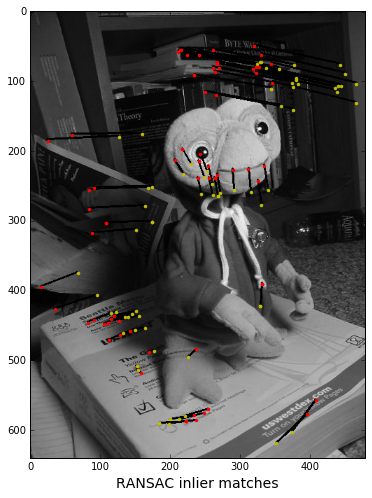

In [10]:
%matplotlib inline
plt.figure(figsize=(15,8))
img1=cv2.imread("et1.jpg",0)

for i in range(len(x1_inliers)):
    cv2.line(img1,(int(x1_inliers[i][0]),int(x1_inliers[i][1])),(int(x2_inliers[i][0]),int(x2_inliers[i][1])),(0,122,0),2)
    plt.plot(x1_inliers[i][0],x1_inliers[i][1],"r.")
    plt.plot(x2_inliers[i][0],x2_inliers[i][1],"y.")
plt.imshow(img1,cmap=plt.cm.gray)
plt.xlabel("RANSAC inlier matches",fontsize=14)

In [24]:
def re_estimateF(x1_normal,x2_normal):
    n=len(x1_normal)
    #print("n is ",n)
    #np.seed=123
    
    
    
    A=np.zeros((n,9),dtype="double")
    h=0
    for j in range(n):

        A[h,:]=[x1_normal[j][0]*x2_normal[j][0], x1_normal[j][1]*x2_normal[j][0],x2_normal[j][0],
                x1_normal[j][0]*x2_normal[j][1], x1_normal[j][1]*x2_normal[j][1],x2_normal[j][1],
               x1_normal[j][0],x1_normal[j][1],1]
        h+=1
        #x1_m.pop(j)
    #m=len(x1_m)
    #print("m is ",m)
    U,S,VT=np.linalg.svd(A)
    V=VT.T
    F_prime=(V[:,8]).reshape(3,3)
    u,s,vt=np.linalg.svd(F_prime)
    s=np.diag(s)
    #F=np.dot(np.dot(u[:,:2],s[:2,:2]),vt[:2,:])
    #print(np.linalg.matrix_rank(F))
    s[2]=0
    F_prime=np.dot(u,np.dot(s,vt))
    F=np.dot(T2.T,np.dot(F_prime,T1)) #compute F
    if F[0,0]<0:
        F=-F
    #print(F)
    return F

In [25]:
F_ransac=re_estimateF(x1_normal_inliers,x2_normal_inliers)

print("The re-estimated fundamental matrix using all inliers is :\n",F_ransac)

The re-estimated fundamental matrix using all inliers is :
 [[  3.73592176e-07   2.23479734e-06  -8.71737297e-04]
 [ -8.70294044e-07   2.83936732e-07  -5.10193267e-03]
 [  1.06457813e-03   4.35217468e-03   1.35204800e-01]]


In [26]:
print(F_ransac[0][0])

3.73592175767e-07


###  1(d),  Determine an essential matrix E, essential matrix is computed by the relation
$$E=K'^TFK$$ where $K'$ and $K$ are the calibration matrix of two cameras respectively. $F$ is the fundamental matrix.



  Here $K'=K $, and we use the **re-estimated fundamental matrix F** to caculate essential matrix E.


#### The next step is to compute SVD of E, $E= U\sum V^T$ .  


By setting the third eigenvalue of E to be zero, we obtain a 3$\times$3 matrix of rank 2.

In [27]:
K=np.zeros((3,3),dtype="double")
K=np.loadtxt("etK.txt")
#K[:,0]=data1[:,0]
#K[:,1]=data1[:,1]
#K[:,2]=data1[:,2]
#print(K)
E=np.dot(K.T,np.dot(F_ransac,K))
u,s,vt=np.linalg.svd(E)
v=vt.T
s=np.diag(s)
s[2]=0
#print(s)
#print(u)
#print(np.linalg.det(u))
#print(np.linalg.det(v))
#print(np.dot(vt.T,vt))
if (np.linalg.det(u)>0 and np.linalg.det(v)<0):
    E=-E
    v=-v
elif (np.linalg.det(u)<0 and np.linalg.det(v)>0):
    E=-E
    u=-u
#E=np.dot(u,np.dot(s,vt))  #update E

print("The essential matrix E is :\n",E)

The essential matrix E is :
 [[ 0.1740893   1.04138772 -0.04480517]
 [-0.40554618  0.13231098 -3.56350477]
 [ 0.59764352  3.39995176  0.09723656]]


### 1.(e) using triangulation to determine two camera matrice 


Since camera matrice can only be retrived  at best up to a projective transformation for a given fundamental matrix . We are free to choose a specific pair of calibrated camera matrice, i.e. $P=[I|O ]$, $P'=[ R | t]$.
Which gives the essential matrix $ E = [e']_x P'P^+ = [t]_x R$ ,by compute svd of $E= U\sum V^T$ ,
the 4 possible  solutions for matrix P' is 
$$1. [U W V^T| U_3]$$

$$2. [U W V^T|-U_3] $$

$$3. [U W^T V^T| U_3]$$

$$4. [U W^T V^T|-U_3]$$
where matrix W =[[0,-1,0],[1,0,0],[0,0,1]] ,U_3 the the last column of matrix U.

To determine which solution is right, we random choose a pair image coordinates, and triangulate the pair to obtain the world coordinate $X$, if $X$ is in front both of the cameras, then this camera $P'$ is the right solution.

#### How to check the world coordiante X is in front of the camera?
  Find the camera center C and Z axes in world coordinate system,(by decompose camera matrix, $X_{camera} = R^T \cdot  (Axes)  + C $  , if the angle $\theta$ between line CZ and CX  obeys $$-90^{\circ} < \theta < 90 ^{\circ} $$ , then the point $X_{world}$ is in front of this camera , same procedure for another camera. 

In [28]:
extr1=np.zeros((3,4))
extr1[:,:3]=[[1,0,0],[0,1,0],[0,0,1]]
P1=np.dot(K,extr1)


w=np.zeros((3,3))
w[0,:]=[0,-1,0]
w[1,:]=[1,0,0]
w[2,:]=[0,0,1]
print(w)
extr21=np.zeros((3,4))
extr21[:,:3]=np.dot(u,np.dot(w,vt))
extr21[:,3]=u[:,2]

extr22=np.zeros((3,4))
extr22[:,:3]=np.dot(u,np.dot(w,vt))
extr22[:,3]=-u[:,2]

extr23=np.zeros((3,4))
extr23[:,:3]=np.dot(u,np.dot(w.T,vt))
extr23[:,3]=u[:,2]

extr24=np.zeros((3,4))
extr24[:,:3]=np.dot(u,np.dot(w.T,vt))
extr24[:,3]=-u[:,2]


P2=[np.dot(K,extr21),np.dot(K,extr22),np.dot(K,extr23),np.dot(K,extr24)]  #4 possible solutions


[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]


In [29]:
def triang(x1,x2,P1,P2):
    n=len(x1)
    A=np.zeros((4,4),dtype="double")
    X_world=[]
    for i in range(n):
        A[0,:]=np.dot(x1[i][1],P1[2,:])-P1[1,:]
        A[1,:]=P1[0,:]- np.dot(x1[i][0],P1[2,:])
        A[2,:]=np.dot(x2[i][1],P2[2,:])-P2[1,:]
        A[3,:]=P2[0,:]- np.dot(x2[i][0],P2[2,:])
        u,s,vt=np.linalg.svd(A)
        X=vt.T[:,3]
        X=X/X[3]
        X_world.append(X)
    
    return X_world

In [30]:
def decompose(P):
    w=np.zeros((3,3))
    w[0,:]=[0,0,1]
    w[1,:]=[0,1,0]
    w[2,:]=[1,0,0]
    A=(np.dot(w,P[:,:3])).T
    Qt,Rt = np.linalg.qr(A)   # QR decompose A
    K=np.dot(w,np.dot(Rt.T,w))
    R=np.dot(w,Qt.T)
    
    D=np.zeros((3,3))
    D[0,:]=[1,0,0]
    D[1,:]=[0,1,0]
    D[2,:]=[0,0,1]
    
    if K[0,0]<0:
        D[0,0]=-1
    if K[1,1]<0:
        D[1,1]=-1
    if K[2,2]<0:
        D[2,2]=-1
    K=np.dot(K,D)
    
    R=np.dot(D,R) 
    #C=-np.dot(R.T,np.dot(np.linalg.inv(K),P[:,3]))
    C=-np.dot(np.linalg.inv(np.dot(K,R)),P[:,3])  
    K[:,2]=K[:,2]/K[2,2]
    return (K,R,C)

In [31]:
from math import pi
maxcount=0
solution=0
for i in range(4):
    k=1
    R1=decompose(P1)[1]
    C1=decompose(P1)[2]
    C1Z=np.dot(R1.T,[0,0,k])+C1  #z1 position 
    
    X=triang(x1_inliers,x2_inliers,P1,P2[i]) #compute X world
    
    R2=decompose(P2[i])[1]
    C2=decompose(P2[i])[2]
    C2Z=np.dot(R2.T,[0,0,k])+C2  #z2 position
      
    p=np.random.randint(0,len(x1_inliers))
    
    j=np.array([X[p][0],X[p][1],X[p][2]])
    CX1=(j-C1)/np.linalg.norm(j-C1)
    CZ1=(C1Z-C1)/np.linalg.norm(C1Z-C1)
      
    θ1=np.arccos(np.dot(CX1,CZ1))*180/pi
        
    CX2=(j-C2)/np.linalg.norm(j-C2)
    CZ2=(C2Z-C2)/np.linalg.norm(C2Z-C2)
    θ2=np.arccos(np.dot(CX2,CZ2))*180/pi
        
    constr=(-90<=θ1<=90)&(-90<=θ2<=90)
        
    if constr==1:
        solution=i

X=triang(x1_inliers,x2_inliers,P1,P2[solution]) #using the right solution to triangulate world coordinates
print(solution)
print(len(X))

0
71


In [32]:
from math import pi
maxcount=0
solution=0
for i in range(4):
    X_front=[]
    
    k=1
    R1=decompose(P1)[1]
    C1=decompose(P1)[2]
    C1Z=np.dot(R1.T,[0,0,k])+C1  #z1 position 
    
    X=triang(x1_inliers,x2_inliers,P1,P2[i]) #compute X world
    
    R2=decompose(P2[i])[1]
    C2=decompose(P2[i])[2]
    C2Z=np.dot(R2.T,[0,0,k])+C2  #z2 position
  
    for xx in X:
        j=np.array([xx[0],xx[1],xx[2]])
        CX1=(j-C1)/np.linalg.norm(j-C1)
        CZ1=(C1Z-C1)/np.linalg.norm(C1Z-C1)
      
        θ1=np.arccos(np.dot(CX1,CZ1))*180/pi
        
        CX2=(j-C2)/np.linalg.norm(j-C2)
        CZ2=(C2Z-C2)/np.linalg.norm(C2Z-C2)
        θ2=np.arccos(np.dot(CX2,CZ2))*180/pi
        
        constr=(-90<=θ1<=90)&(-90<=θ2<=90)
        
        if constr==1:
            X_front.append(xx)

    if len(X_front)>=maxcount:
        maxcount=len(X_front)
        X_solu=X_front
        solution=i

#print(X_front)

print(len(X))
#print(len(boole))
print(len(X_solu))
print(solution)   
X=triang(x1_inliers,x2_inliers,P1,P2[solution]) #using the right solution to triangulate world coordinates

print(len(X))

71
71
0
71


18


In [21]:
print(len(x1_inliers))
#print(x1_inliers)
#x1_inliers.pop(63)

71


In [179]:
#X_add=triang(x1_inliers_add,x2_inliers_add,P1,P2[solution]) 

In [33]:
print("Camera matrix P1 is \n\n",P1)
print("\n")
print("Camera matrix P2 is \n\n",P2[solution])

Camera matrix P1 is 

 [[ 682.6328    0.      240.5       0.    ]
 [   0.      682.6328  320.5       0.    ]
 [   0.        0.        1.        0.    ]]


Camera matrix P2 is 

 [[  6.20363676e+02  -1.03690978e+02   3.58085019e+02  -5.82471168e+02]
 [  4.66577110e+01   6.76349532e+02   3.30275882e+02   1.07264155e+02]
 [ -1.79213718e-01   5.82335484e-03   9.83792931e-01   2.92095074e-01]]


In [34]:
krc1=decompose(P1)
K1=krc1[0]
R1=krc1[1]
C1=krc1[2]
print("The intrinsic matrix K1 is: \n\n",K1)
print("\nThe Rotation matrix R1 is: \n\n",R1)
print("\nThe camera center C1 in the world coordinate system is:\n\n " ,C1)

krc2=decompose(P2[solution])
K2=krc2[0]
R2=krc2[1]
C2=krc2[2]
print("The intrinsic matrix K2 is: \n",K2)
print("\nThe Rotation matrix R2 is: \n",R2)
print("\nThe camera center C2 in the world coordinate system is:\n ",C2)
k=4

C1X=np.dot(R1.T,[k,0,0])+C1
C1Y=np.dot(R1.T,[0,k,0])+C1
C1Z=np.dot(R1.T,[0,0,k])+C1

C2X=np.dot(R2.T,[k,0,0])+C2
C2Y=np.dot(R2.T,[0,k,0])+C2
C2Z=np.dot(R2.T,[0,0,k])+C2

The intrinsic matrix K1 is: 

 [[ 682.6328    0.      240.5   ]
 [   0.      682.6328  320.5   ]
 [   0.        0.        1.    ]]

The Rotation matrix R1 is: 

 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]

The camera center C1 in the world coordinate system is:

  [-0. -0. -0.]
The intrinsic matrix K2 is: 
 [[  6.82632800e+02   2.13162821e-13   2.40500000e+02]
 [  0.00000000e+00   6.82632800e+02   3.20500000e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]

The Rotation matrix R2 is: 
 [[ 0.97192015 -0.15395026  0.17796218]
 [ 0.15249151  0.98806144  0.02193016]
 [-0.17921372  0.00582335  0.98379293]]

The camera center C2 in the world coordinate system is:
  [ 0.97862962 -0.16865921 -0.11763559]


In [83]:
x11=[]
x22=[]

for i in range(len(x1_m)):
    x11.append([x1_m[i],y1_m[i]])
    x22.append([x2_m[i],y2_m[i]])
X_all=triang(x11,x22,P1,P2[solution]) #using the right solution to triangulate world coordinates


In [35]:
#img1=np.array(Image.open("et1.jpg"))
img1=cv2.imread('et1.jpg',1)
m,n,c=img1.shape

col=[]
for i in range(len(X)):
    x1=np.dot(P1,[X[i][0],X[i][1],X[i][2],1])
    x1/=x1[2]
    if (int(x1[0])<n) and (int(x1[1])<m):
        c1=img1[int(x1[1]),int(x1[0]),:]/255
        col.append(c1)
print(len(col))
print(col[:4])

71
[array([ 0.42352941,  0.37647059,  0.44705882]), array([ 0.12941176,  0.10588235,  0.18039216]), array([ 0.10980392,  0.09411765,  0.1372549 ]), array([ 0.07843137,  0.18039216,  0.47843137])]


### 1(f). Triangulate all inlier matches, and 3D reconstruction the object.

First of all, we know that the color of the world point X  determintes the color of the point x on image , now we know the camera matrix P and the world coordinates X, what we only need to know is the coordinate index, then we can obtain world point color through equation $x = PX$, theoretically,  we can paint the 3d object.

The world points coordinates are triangulated by the inliers ($x$, $x'$)and two camera matrice($P$,$P'$).

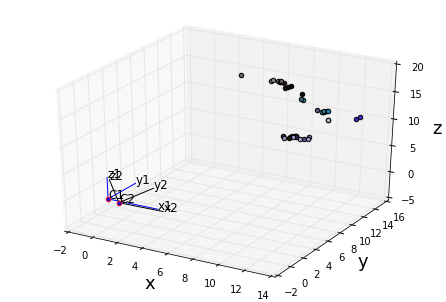

In [40]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
a=2
b=10
#X=X_add   #only draw points before two cameras
#print(len(X))
    #print(len(x1_inliers))
dist=[]
for i in range(len(X)):

    d1=np.linalg.norm([X[i][0],X[i][1],X[i][2]]-C1)
    d2=np.linalg.norm([X[i][0],X[i][1],X[i][2]]-C2)
    if d1<10 and d2<10:  #only count World points close to camera
        #print(i)
#print(dist)
    
        ax.scatter(a*X[i][0]+b,a*X[i][1]+b,a*X[i][2],c=col[i])
    
ax.text(C1[0],C1[1],C1[2],'C1',fontsize=12)
ax.scatter(C1[0],C1[1],C1[2],color="r") #camera 1

ax.plot((C1[0],C1X[0]),(C1[1],C1X[1]),(C1[2],C1X[2]),color="b") #camera 1
#ax.scatter(C1X[0],C1X[1],C1X[2],color="r") #camera 1
ax.text(C1X[0],C1X[1],C1X[2],'x1',fontsize=12)

ax.plot((C1[0],C1Y[0]),(C1[1],C1Y[1]),(C1[2],C1Y[2]),color="b") #camera 1
#ax.scatter(C1Y[0],C1Y[1],C1Y[2],color="r") #camera 1
ax.text(C1Y[0],C1Y[1],C1Y[2],'y1',fontsize=12)

ax.plot((C1[0],C1Z[0]),(C1[1],C1Z[1]),(C1[2],C1Z[2]),color="b") #camera 1
#ax.scatter(C1Z[0],C1Z[1],C1Z[2],color="r") #camera 1
ax.text(C1Z[0],C1Z[1],C1Z[2],'z1',fontsize=12)


ax.text(C2[0],C2[1],C2[2],'C2',fontsize=12)
ax.scatter(C2[0],C2[1],C2[2],color="r") #camera 2
ax.plot((C2[0],C2X[0]),(C2[1],C2X[1]),(C2[2],C2X[2]),color="k") #camera 2
#ax.scatter(C2[0],C2[1],C2[2],color="r") #camera 2
ax.text(C2X[0],C2X[1],C2X[2],'x2',fontsize=12)
        
ax.plot((C2[0],C2Y[0]),(C2[1],C2Y[1]),(C2[2],C2Y[2]),color="k") #camera 2
#ax.scatter(C2Y[0],C2Y[1],C2Y[2],color="k") #camera 2
ax.text(C2Y[0],C2Y[1],C2Y[2],'y2',fontsize=12)

ax.plot((C2[0],C2Z[0]),(C2[1],C2Z[1]),(C2[2],C2Z[2]),color="k") #camera 2
#ax.scatter(C2Z[0],C2Z[1],C2Z[2],color="k") #camera 2
ax.text(C2Z[0],C2Z[1],C2Z[2],'z2',fontsize=12)
#col.tolist()
#x=[i[0] for i in X]
#y=[i[1] for i in X]
#z=[i[2] for i in X]
#ax.scatter(x,y,z,zdir="z",s=len(x)*len(x),c=col,marker="o")


plt.xlabel("x",fontsize=18)
plt.ylabel("y",fontsize=18)
ax.set_zlabel("z",fontsize=18)
plt.show()

### Comment: The camera 2 lies on the right side of camera 1, the world points (only  euclidean distance smaller than 6 are drawn )are in front of both cameras, the different views of this 3d object are unable to show due to its bug in 3d plot.

###  2. Image rectification   
The benefit of image rectification is to find corresponding features have the same y coordiantes, which is to say the features are on paralle epipolar lines. Below is the figure shown epipolar lines drawn on two images before rectification. The two epipoles are finite points though not shown on images. 

In [41]:
Kn=K1

Rn=np.zeros((3,3))
Rn[0,:]=(C2-C1)/np.linalg.norm(C2-C1)

Kx=np.dot(R1.T,[0,0,1])

Rn[1,:]=(np.cross(Kx,Rn[0,:]))/np.linalg.norm(np.cross(Kx,Rn[0,:]))
Rn[2,:]=(np.cross(Rn[0,:],Rn[1,:]))/np.linalg.norm(np.cross(Rn[0,:],Rn[1,:]))

T1=np.dot(Kn,np.dot(Rn,np.dot(R1.T,np.linalg.inv(K1))))
T2=np.dot(Kn,np.dot(Rn,np.dot(R2.T,np.linalg.inv(K2))))
#T1/=T1[2,2]
#T2/=T2[2,2]
print("Homography matrix T1 is \n",T1)
print("\n")
print("Homography matrix T2 is \n",T2)

Homography matrix T1 is 
 [[  1.01947199e+00  -1.75698073e-01  -3.03435229e+01]
 [  2.24266611e-01   9.76091647e-01  -4.84987786e+01]
 [  1.69822731e-04  -2.92676276e-05   9.61594738e-01]]


Homography matrix T2 is 
 [[  1.05922241e+00  -1.30468095e-02  -2.20020254e+02]
 [  1.50673805e-01   1.00886212e+00  -7.00169138e+01]
 [  4.28449526e-04   2.88811102e-05   8.43771807e-01]]


(640, 480, 3)
(640, 480, 3)


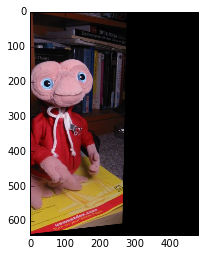

In [42]:
%matplotlib inline
img1=np.array(Image.open("et1.jpg"))
m,n,c=img1.shape
img1_rec=cv2.warpPerspective(img1,T1,(n,m),flags=1)
#plt.imshow(img1)
#plt.imshow(img1_rec)
print(img1_rec.shape)
img2=np.array(Image.open("et2.jpg"))
m,n,c=img2.shape 
img2_rec=cv2.warpPerspective(img2,T2,(n,m),flags=1)   #qucik check the homography  , doesn't really use cv2 built-in package
#plt.imshow(img1)
plt.imshow(img2_rec)
print(img1_rec.shape)

In [82]:
import math
def applyhomography(A,H):
    A=np.float64(A)
    m,n,c=A.shape
    x_0,y_0=n/2,m/2
    
    
    p1=np.dot(H,[0,0,1]);p1=p1/p1[2]
    p2=np.dot(H,[n-1,0,1]);p2=p2/p2[2]
    p3=np.dot(H,[0,m-1,1]);p3=p3/p3[2]
    p4=np.dot(H,[n-1,m-1,1]);p4=p4/p4[2]
    minx=math.floor(min([p1[0],p2[0],p3[0],p4[0]]))
    maxx= math.ceil(max([p1[0],p2[0],p3[0],p4[0]]))
    miny=math.floor(min([p1[1],p2[1],p3[1],p4[1]]))
    maxy= math.ceil(max([p1[1],p2[1],p3[1],p4[1]]))
    
    nn=int(maxx-minx+1)
    mm=int(maxy-miny+1)
    
    #B=Image.new("RGB",(mm,nn),"white")   #create a new image
    B=np.zeros((mm,nn,c))+255
    H_inverse=np.linalg.inv(H)
    
    for x in range(nn):
        for y in range(mm):
            p=[x+minx-1,y+miny-1,1]
            pp=np.dot(H_inverse,p)
            xp=pp[0]/pp[2]
            yp=pp[1]/pp[2]
            
            xpf=math.floor(xp);xpc=xpf+1
            ypf=math.floor(yp);ypc=ypf+1
            if xpf>=0 and xpc<n and ypf>=0 and ypc<m:
                B[y,x,:]=(xpc-xp)*(ypc-yp)*A[ypf,xpf,:]+(xpc-xp)*(yp-ypf)*A[ypc,xpf,:]+(xp-xpf)*(ypc-yp)*A[ypf,xpc,:]+(xp-xpf)*(yp-ypf)*A[ypc,xpc,:]
    B=np.uint8(B)        
    #print(minx,miny,maxx,maxy)
    #print("p",p1,p2,p3,p4)
    #print
    return B

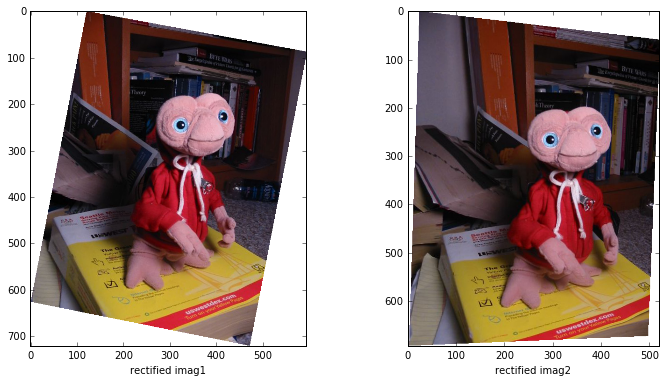

In [83]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.subplot(121)
img1=np.array(Image.open("et1.jpg"))
img1_rec=applyhomography(img1,T1)
plt.imshow(img1_rec)
plt.xlabel("rectified imag1")
plt.subplot(122)
img2=np.array(Image.open("et2.jpg"))
img2_rec=applyhomography(img2,T2)
plt.xlabel("rectified imag2")
plt.imshow(img2_rec)

The epipole e1 is :
 [ -9.22801958e+03   2.05326755e+03   1.00000000e+00]

The epipole e2 is :
 [ -2.48726993e+03   4.01344672e+02   1.00000000e+00]
The fundemental matrix F is :

  [[ -1.73460798e-01  -9.86958149e-01   4.25789500e+02]
 [  2.75200180e-01  -1.14715093e-01   2.77509343e+03]
 [ -5.41893953e+02  -2.40879104e+03  -5.47155423e+04]]


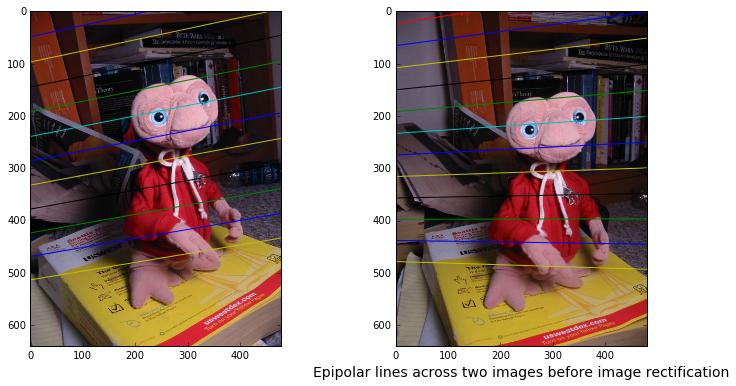

In [97]:
img1=np.array(Image.open("et1.jpg"))
C11=np.append(C1,[1],axis=0)
C22=np.append(C2,[1],axis=0)
#print(C11)
e1=np.dot(P1,C22)
e1=e1/e1[2]
e2=np.dot(P2[solution],C11)
e2=e2/e2[2]
print("The epipole e1 is :\n",e1)
print("\nThe epipole e2 is :\n",e2)
e2x=np.zeros((3,3))
e2x[0,1]=-e2[2]
e2x[1,0]= e2[2]

e2x[0,2]= e2[1]
e2x[2,0]=-e2[1]

e2x[1,2]=-e2[0]
e2x[2,1]= e2[0]
Psinv=np.linalg.pinv(P1)
F = np.dot(e2x,np.dot(P2[solution],Psinv))
Psinv=np.linalg.pinv(P1)
print("The fundemental matrix F is :\n\n ",F)
m1,n1,c=img1.shape
m2,n2,c=img2.shape

match=np.zeros((max(m1,m2),n1+n2,c),dtype="uint8")+255
match[0:m1,:n1,:]=img1
match[0:m2,n1:,:]=img2

plt.figure(figsize=(12,6))

x1_inliers=[(a,b,1) for a,b in zip(np.arange(0,n1,10),np.arange(0,m1,10))]
a=np.arange(0,len(x1_inliers),4)
b=["-r","-b","-y","-k","-g","-c","-b","-y","-k","-g","-b","-y","-k","-g"]

linex=np.arange(0,n1,1)

linex_prime=np.arange(0,n2,1)
plt.subplot(121)
for k,f in zip(a,b):
    ly=np.cross(x1_inliers[k],e1)  #line xe epipolar line throuth x and e 
    liney=-ly[2]/ly[1]-ly[0]*linex/ly[1]
    
    plt.plot(linex,liney,f)
    #plt.plot(x1_inliers[k][0],x1_inliers[k][1],"ro")
plt.imshow(img1)
plt.subplot(122)
for k,f in zip(a,b):
    ly=np.cross(x1_inliers[k],e1)  #line xe epipolar line throuth x and e 
    liney=-ly[2]/ly[1]-ly[0]*linex/ly[1]
    
    
    l_prime=np.dot(F_ransac,x1_inliers[k])  #using F_ransac
    liney_prime=-l_prime[2]/l_prime[1]-l_prime[0]*(linex_prime)/l_prime[1]
    #plt.plot(x2_inliers[k][0]+n1,x2_inliers[k][1],"ro")
    plt.plot(linex_prime,liney_prime,f)
    
plt.imshow(img2)
plt.xlabel("Epipolar lines across two images before image rectification",fontsize=14)

### The steps of image rectification:
1. Given two camera matrice $P_1$ and $P_2$, decompose each of them into  $K_1$,$R_1$ and $C_1$ , $K_2$,$R_2$ and $C_2$.

2. Construct two new camra matrice $P_1'$ and $P_2'$, where $P_1'= K_n R_n [I| -C_1]$,    $P_2'= K_n R_n [I| -C_2]$

3. $K_n = \frac{1}{2}(K_1 +K _2)$, $R_n = [r_1^T, r_2^T, r_3^T]^T$ , where
$$r_1= \frac{C_2-C_1}{||C2-C1||}$$
$$r_2= k\times r_1, k=R_1^T\cdot [0,0,1]^T $$
$$r_3 = r_1 \times r_2$$
The homography matrix for image 1 is $$T_1=K_n R_n R_1^T K_1^{-1}$$  the new image is obtained by apply homography transformation to all the original points in image 1,  $$ x_1' = T_1 x_1$$  



Same for image 2 is $$T_2=K_n R_n R_2^T K_2^{-1}  , x_2' = T_2 x_2 $$

The epipole e1 is :
 [1, 0, 0]

The epipole e2 is :
 [1, 0, 0]
The fundemental matrix F' is :

  [[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.93023288e-19  -1.11791831e-19  -1.00000000e+00]
 [ -3.08780779e-16   1.00000000e+00   5.68434189e-14]]


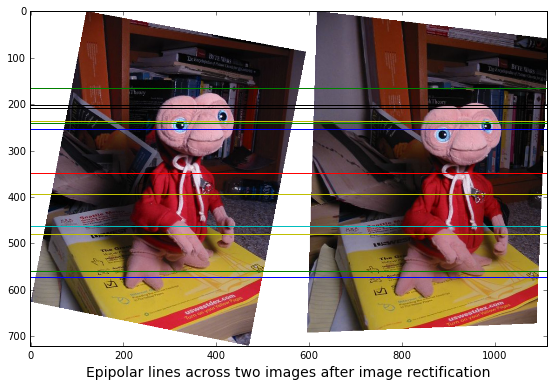

In [84]:
M=np.dot(Kn,Rn)
extr1=np.zeros((3,4))
extr1[:,:3]=[[1,0,0],[0,1,0],[0,0,1]]
extr1[:,3]=-C1
P1_prime=np.dot(M,extr1)
extr2=np.zeros((3,4))
extr2[:,:3]=[[1,0,0],[0,1,0],[0,0,1]]
extr2[:,3]=-C2
P2_prime=np.dot(M,extr2)

C11=np.append(C1,[1],axis=0)
C22=np.append(C2,[1],axis=0)
#print(C11)
#e1=np.dot(P1_prime,C22)
#e1=e1/e1[2]
#e2=np.dot(P2_prime,C11)
#e2=e2/e2[2]
e1=[1,0,0]
e2=[1,0,0]
print("The epipole e1 is :\n",e1)
print("\nThe epipole e2 is :\n",e2)
e2x=np.zeros((3,3))
e2x[0,1]=-e2[2]
e2x[1,0]= e2[2]

e2x[0,2]= e2[1]
e2x[2,0]=-e2[1]

e2x[1,2]=-e2[0]
e2x[2,1]= e2[0]
Psinv=np.linalg.pinv(P1_prime)
F_prime = np.dot(e2x,np.dot(P2_prime,Psinv))
#Psinv=np.linalg.pinv(P1)
print("The fundemental matrix F' is :\n\n ",F_prime)
m1,n1,c=img1_rec.shape
m2,n2,c=img2_rec.shape
#print(m1,n1)
#print(m2,n2)
match=np.zeros((max(m1,m2),n1+n2,c),dtype="uint8")+255
match[0:m1,:n1,:]=img1_rec
match[0:m2,n1:,:]=img2_rec

plt.figure(figsize=(12,6))    

#x1_inliers=[(a,b,1) for a,b in zip(np.arange(0,n1,10),np.arange(0,m1,10))]
a=np.arange(0,len(x1_inliers),4)
b=["-r","-b","-y","-k","-g","-c","-b","-y","-k","-g","-b","-y","-k","-g"]

linex=np.arange(0,n1,1)

linex_prime=np.arange(n1,n1+n2,1)

for k,f in zip(a,b):
    x1_inliers_prime=np.dot(T1,x1_inliers[k])    #in the rectified image x'=Tx
    ly=np.cross(x1_inliers_prime,e1)  #line xe epipolar line throuth x' and e 
    liney=-ly[2]/ly[1]-ly[0]*linex/ly[1]

    #plt.plot(x1_inliers_prime[0],x1_inliers_prime[1],"r.")
    plt.plot(linex,liney,f)
    #plt.plot(x1_inliers[k][0],x1_inliers[k][1],"ro")
    
    l_prime=np.dot(F_prime,x1_inliers_prime)
    liney_prime=-l_prime[2]/l_prime[1]-l_prime[0]*(linex_prime-n1)/l_prime[1]

    plt.plot(linex_prime,liney_prime,f)

plt.imshow(match)
plt.xlabel("Epipolar lines across two images after image rectification",fontsize=14)

In [198]:
print(m1-m2)

29


The epipole e1 is :
 [1, 0, 0]

The epipole e2 is :
 [1, 0, 0]
The fundemental matrix F' is :

  [[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.93023288e-19  -1.11791831e-19  -1.00000000e+00]
 [ -3.08780779e-16   1.00000000e+00   5.68434189e-14]]


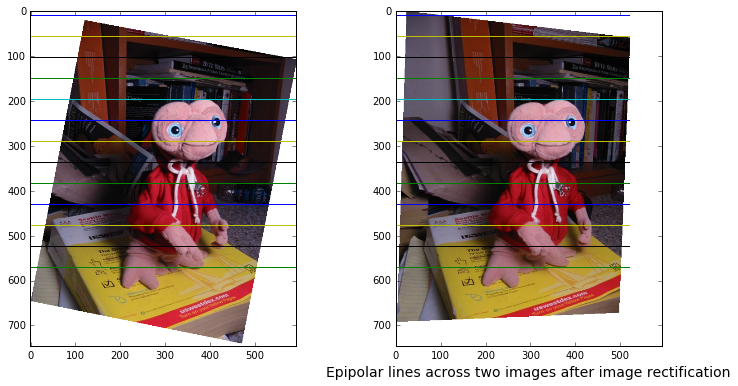

In [92]:
M=np.dot(Kn,Rn)
extr1=np.zeros((3,4))
extr1[:,:3]=[[1,0,0],[0,1,0],[0,0,1]]
extr1[:,3]=-C1
P1_prime=np.dot(M,extr1)
extr2=np.zeros((3,4))
extr2[:,:3]=[[1,0,0],[0,1,0],[0,0,1]]
extr2[:,3]=-C2
P2_prime=np.dot(M,extr2)

C11=np.append(C1,[1],axis=0)
C22=np.append(C2,[1],axis=0)
#print(C11)
#e1=np.dot(P1_prime,C22)
#e1=e1/e1[2]
#e2=np.dot(P2_prime,C11)
#e2=e2/e2[2]
e1=[1,0,0]
e2=[1,0,0]
print("The epipole e1 is :\n",e1)
print("\nThe epipole e2 is :\n",e2)
e2x=np.zeros((3,3))
e2x[0,1]=-e2[2]
e2x[1,0]= e2[2]

e2x[0,2]= e2[1]
e2x[2,0]=-e2[1]

e2x[1,2]=-e2[0]
e2x[2,1]= e2[0]
Psinv=np.linalg.pinv(P1_prime)
F_prime = np.dot(e2x,np.dot(P2_prime,Psinv))
#Psinv=np.linalg.pinv(P1)
print("The fundemental matrix F' is :\n\n ",F_prime)
m1,n1,c=img1_rec.shape
m2,n2,c=img2_rec.shape

plt.figure(figsize=(12,6))    

x1_inliers=[(a,b,1) for a,b in zip(np.arange(0,n1,10),np.arange(0,m1,10))]
a=np.arange(0,len(x1_inliers),4)
b=["-r","-b","-y","-k","-g","-c","-b","-y","-k","-g","-b","-y","-k","-g"]

linex=np.arange(0,n1,1)

linex_prime=np.arange(0,n2,1)
img1_new=np.zeros((m1+25,n1,c),dtype="uint8")+255
img1_new[20:m1+20,:n1,:]=img1_rec
plt.subplot(121)    

for k,f in zip(a,b):
    x1_inliers_prime=np.dot(T1,x1_inliers[k])
    ly=np.cross(x1_inliers_prime,e1)  #line xe epipolar line throuth x and e 
    liney=-ly[2]/ly[1]-ly[0]*linex/ly[1]

    #plt.plot(x1_inliers_prime[0],x1_inliers_prime[1],"r.")
    plt.plot(linex,liney,f)
    #plt.plot(x1_inliers[k][0],x1_inliers[k][1],"ro")
plt.imshow(img1_new)

img2_new=np.zeros((m1+25,n1,c),dtype="uint8")+255
img2_new[:m2,:n2,:]=img2_rec
plt.subplot(122)

for k,f in zip(a,b): 
    x1_inliers_prime=np.dot(T1,x1_inliers[k])
    l_prime=np.dot(F_prime,x1_inliers_prime)
    liney_prime=-l_prime[2]/l_prime[1]-l_prime[0]*(linex_prime)/l_prime[1]

    plt.plot(linex_prime,liney_prime,f)
plt.imshow(img2_new)

#plt.imshow(match)
plt.xlabel("Epipolar lines across two images after image rectification",fontsize=14)

### The left corner of recitified image1 is not coincident with (0,0) , because when we apply homograhy transformation, the origin of image1 (0,0) is also tranformed,  then the new image origin is determinated by the minimum x value of these 4 corners, is not necessary to be exactly (0,0) .